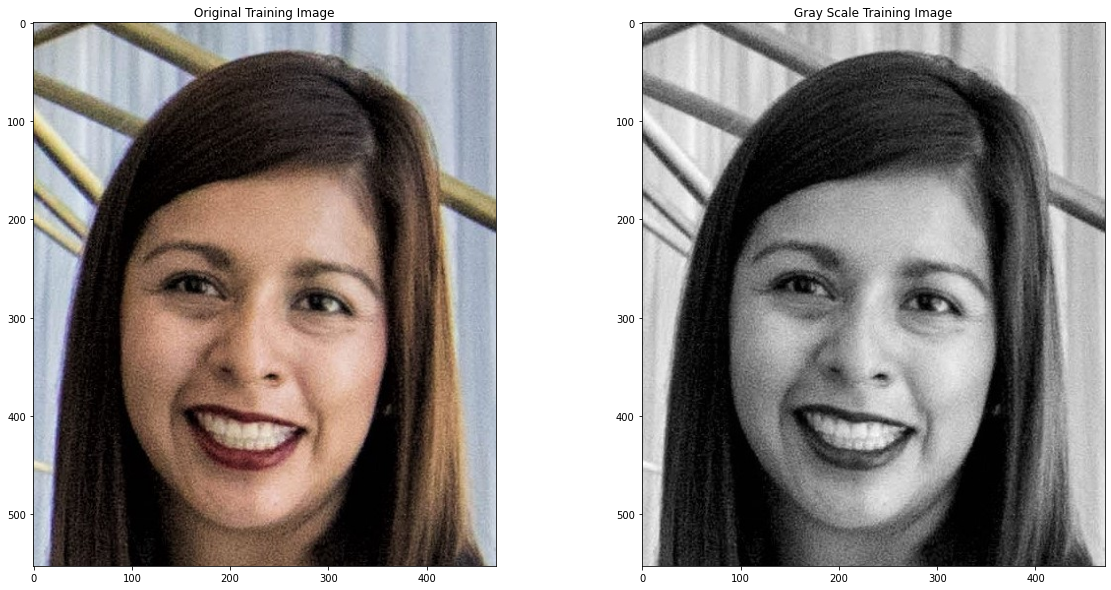

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

plt.rcParams['figure.figsize']=[20,10]

image=cv2.imread("/home/jesterrexx/Documents/Deep Learning/Udacity-Computer-Vision-Nanodegree-master/Part 1- Introduction to Computer Vision/1_4_Feature_Vectors/images/face.jpeg")
training_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
training_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#display the images
plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap='gray')
plt.show()

# Locating Keypoints

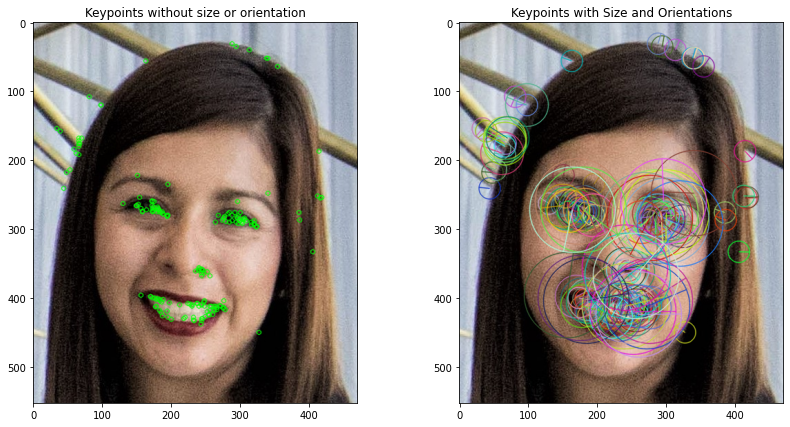


Number of keypoints Detected:  175


In [8]:
import copy
plt.rcParams['figure.figsize']=[14.0, 7.0]
orb=cv2.ORB_create(200,2.0)
keypoints,descriptor=orb.detectAndCompute(training_gray,None)

keyp_without_size=copy.copy(training_image)
keyp_with_size=copy.copy(training_image)

cv2.drawKeypoints(training_image,keypoints,keyp_without_size,color=(0,255,0))

cv2.drawKeypoints(training_image,keypoints,keyp_with_size,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(121)
plt.title('Keypoints without size or orientation')
plt.imshow(keyp_without_size)

plt.subplot(122)
plt.title('Keypoints with Size and Orientations')
plt.imshow(keyp_with_size)
plt.show()

print("\nNumber of keypoints Detected: ",len(keypoints))

# Feature Matching

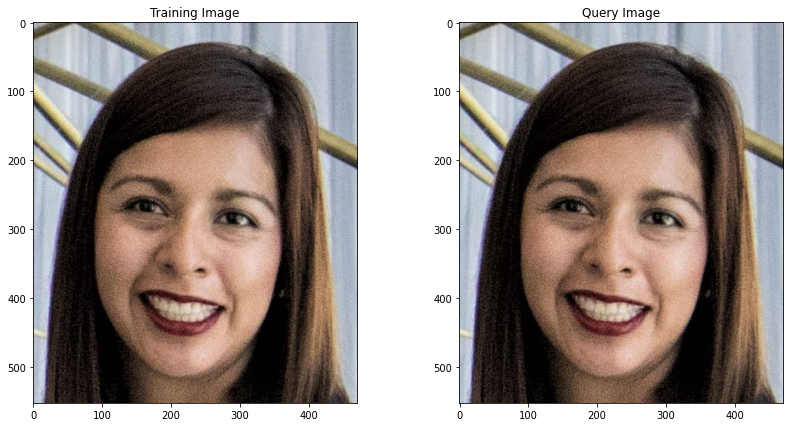

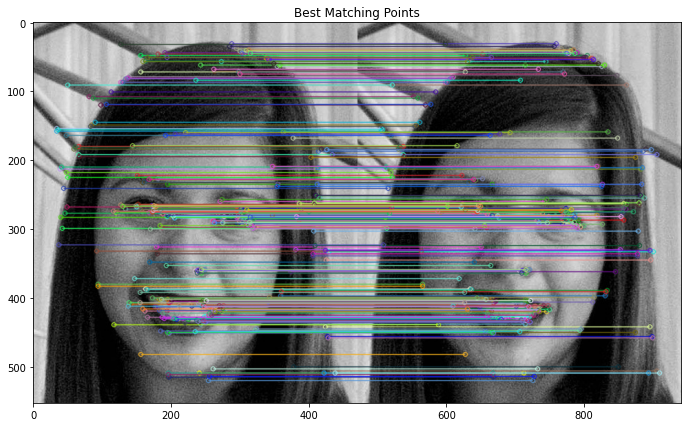

Number of Keypoints Detected In The Training Image:  821
Number of Keypoints Detected In The Query Image:  821

Number of Matching Keypoints Between The Training and Query Images:  821


In [11]:
plt.rcParams['figure.figsize']=[14.0,7.0]
image1=cv2.imread('/home/jesterrexx/Documents/Deep Learning/Udacity-Computer-Vision-Nanodegree-master/Part 1- Introduction to Computer Vision/1_4_Feature_Vectors/images/face.jpeg')

image2=cv2.imread('/home/jesterrexx/Documents/Deep Learning/Udacity-Computer-Vision-Nanodegree-master/Part 1- Introduction to Computer Vision/1_4_Feature_Vectors/images/face.jpeg')

training_image=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
query_image=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

#displaying the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training and query images to gray scale
training_gray=cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)
query_gray=cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

orb=cv2.ORB_create(1000, 2.0)

keypoints_train, description_train=orb.detectAndCompute(training_gray,None)
keypoints_query, description_query=orb.detectAndCompute(query_gray,None)

bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches=bf.match(description_train,description_query)

matches=sorted(matches,key=lambda x:x.distance)

result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# ORB's Main Properties

>Scale Invariance 

>Rotational Invariance

>Illumination Invariance

>Noise Invariance

# Scale Invariance